# Prediction using pytorch

Lets us import pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Let us import pyrotch.

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

Let us create a class which will create our input and output variables.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class Data(Dataset):
    
    # Constructor
    def __init__(self,file):
        df=pd.read_csv(file)

        x=df.drop(['Price'],axis=1)
        y=df[['Price']]
        X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.33, random_state=42)

        x=X_train
        y=y_train
        x_new=x.iloc[:,:].values
        y_new=y.iloc[:,:].values
        
        sc=StandardScaler()
        X_train=sc.fit_transform(x_new)
        Y_train=y_new
        
        self.X_train=torch.tensor(x_new,dtype=torch.float64)
        self.Y_train=torch.tensor(y_new,dtype=torch.float64)
        
    # Getter
    def __getitem__(self,index):    
        return self.X_train[index],self.Y_train[index]
    
    # Get Length
    def __len__(self):
        return len(self.Y_train)
    
    def __testx__(self):
        return X_test.iloc[:,:].values
    def __testy__(self):
        return y_test.iloc[:,:].values

Let us load our dataset.

In [4]:
df=Data('Dataset/train_clean_data.csv')

Let us create the Model and Total Loss Function (Cost)

In [5]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

 Build a cost function.

In [6]:
criterion = nn.MSELoss()

Create optimizer.

In [7]:
model = linear_regression(29,1) #29 inputs an 1 output
optimizer = optim.Adamax(model.parameters(), lr = 0.00001)#Using Adamax

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0957, -0.0820, -0.0360,  0.0872, -0.1748,  0.1114, -0.0382,  0.0945,
           0.0258, -0.0227,  0.0515,  0.0092,  0.0678, -0.0724, -0.0135, -0.0167,
           0.0269, -0.0007,  0.1623,  0.0578, -0.0692, -0.1122, -0.0311, -0.0801,
          -0.0595,  0.0089,  0.1107,  0.1009, -0.1815]], requires_grad=True),
 Parameter containing:
 tensor([0.1151], requires_grad=True)]

In [9]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 1e-05,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'params': [0, 1]}]}

Create Dataloader object

In [28]:
trainloader = DataLoader(dataset = df, batch_size = 10)#Let us take batch size as 10

Let us train the model.

In [29]:
# Train Model
LOSS=[]
def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x.float())
            loss = criterion(yhat, y.float())
            LOSS.append(loss)
            optimizer.zero_grad#Set gradient to 0,Stochastic Gradient Descent
            loss.backward()

            optimizer.step()#Update the parameters



train_model_BGD(10)

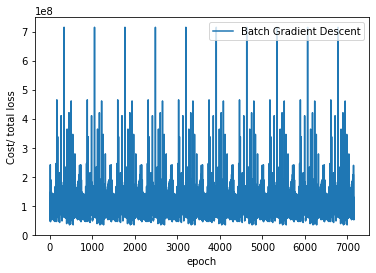

In [30]:
plt.plot(LOSS,label="Batch Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

Our loss is in the range of 1 to 0.